## **Implementing a 1D Convet**

In [1]:
from keras.models import Model
from keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, Input, Embedding, Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# **Preparing Data**

In [2]:
from keras.datasets import imdb
max_features = 10000 # no of words to be considered as features
max_len= 500 # cut the texts after these many no of words
(train_data,train_lab),(test_data,test_lab) = imdb.load_data(num_words=max_features)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(train_data, maxlen=max_len, padding='post')
x_test = pad_sequences(test_data, maxlen=max_len, padding='post')

In [4]:
vocab = imdb.get_word_index()

**pre-processing the embeddings**

In [5]:
import numpy as np

def get_glove_model(glove_dir):
  embeddings_index = {}
  f = open(glove_dir)

  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
  f.close()
  print('Total %s word vectors: '%len(embeddings_index))
  return embeddings_index

**Building Embedding Matrix**

In [6]:
def embedding_matrix(tk_vocab,glove_vocab,embed_size):
  matrix = np.zeros((len(tk_vocab)+1,embed_size))   #tokenizer vocab starts from index 1
                                                    #len(vocab)+1 --->>  index 0 will be stored for paddings
  c = 0
  for word,i in tk_vocab.items():
    embedding_vector = glove_vocab.get(word)
    if embedding_vector is not None:
      matrix[i] = embedding_vector
      c+=1
  print('Found {} embeddings '.format(c))
  print('Missed {} embeddings '.format(len(tk_vocab) - c))

  return matrix

In [7]:
glove_vocab = get_glove_model('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/data/glove.6B.100d.txt')

Total 400000 word vectors: 


In [8]:
embedding_matrix =  embedding_matrix(vocab,glove_vocab,100)

Found 60150 embeddings 
Missed 28434 embeddings 


# **Network Building**

In [9]:
input = Input(shape=(max_len,))
embedding = Embedding(input_dim=len(vocab)+1, output_dim= 100, input_length=max_len, weights=[embedding_matrix],trainable=False)(input)

output = Conv1D(32,7,activation='relu')(embedding)
output = MaxPool1D(5)(output)
output = Conv1D(32,7,activation='relu')(output)
output = GlobalMaxPooling1D()(output)
output = Dense(1,activation='sigmoid')(output)

model = Model(inputs=input, outputs=output)
model.compile(optimizer=RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])
model.fit(x_train, train_lab, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 53s 333ms/step - loss: 0.7024 - acc: 0.5126 - val_loss: 0.7034 - val_acc: 0.5054
Epoch 2/10
157/157 [==============================] - 51s 325ms/step - loss: 0.6862 - acc: 0.5497 - val_loss: 0.6859 - val_acc: 0.5502
Epoch 3/10
157/157 [==============================] - 50s 321ms/step - loss: 0.6741 - acc: 0.5867 - val_loss: 0.6969 - val_acc: 0.5214
Epoch 4/10
157/157 [==============================] - 54s 346ms/step - loss: 0.6661 - acc: 0.5980 - val_loss: 0.6926 - val_acc: 0.5324
Epoch 5/10
157/157 [==============================] - 52s 334ms/step - loss: 0.6585 - acc: 0.6186 - val_loss: 0.6741 - val_acc: 0.5742
Epoch 6/10
157/157 [==============================] - 66s 420ms/step - loss: 0.6503 - acc: 0.6347 - val_loss: 0.6872 - val_acc: 0.5454
Epoch 7/10
157/157 [==============================] - 61s 386ms/step - loss: 0.6419 - acc: 0.6465 - val_loss: 0.6661 - val_acc: 0.5920
Epoch 8/10
157/157 [==============================] - 5

**Training v/s Validation Results**

In [10]:
dict_ = model.history.history
dict_.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [11]:
train_acc = dict_['acc']
train_loss = dict_['loss']
val_acc = dict_['val_acc']
val_loss = dict_['val_loss']
epochs = range(1,len(train_acc)+1)

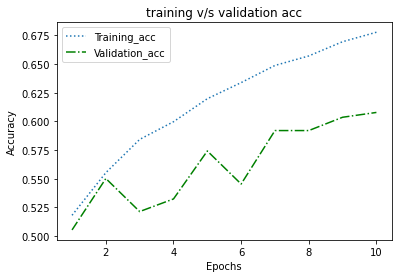

In [12]:
plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()

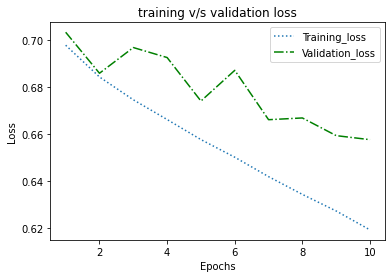

In [13]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('training v/s validation loss')
plt.legend()

In [14]:
# validation accuracy is somewhat lower than that of the LSTM we used two sections ago, but runtime is faster, both on CPU and GPU
# This is a convincing demonstration that a 1D convnet can offer a fast, cheap alternative to a recurrent network on a word-level sentiment classification task.

# **Implementing a 1D Convet on Time Series Data**

In [15]:
#Because 1D convnets process input patches independently, they are not sensitive to the order of the timesteps unlike RNN's
#One way to evidence this weakness is to try 1D convnets on the temperature forecasting problem from the previous section,
# where order-sensitivity was key to produce good predictions. let's see...!!

In [16]:
import os
import numpy as np
import glob
import pandas as pd
base_path = '/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/data/time_series_data/'
files = glob.glob(os.path.join(base_path,'*.csv'))

**Preparing Data**

In [17]:
dfs = []
for file in files:
  df = pd.read_csv(file,encoding='latin1')
  dfs.append(df)
data = pd.concat(dfs,axis=0,ignore_index=True)
data.shape

(420551, 22)

In [18]:
data.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)',
       'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)'],
      dtype='object')

In [19]:
data = data[['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']]

In [20]:
cols = data.select_dtypes(np.number).columns
data_n = data[cols]

float_data = data_n.to_numpy('float32')

In [21]:
mean = float_data[:200000].mean(axis=0)
std = float_data[:200000].std(axis=0)

float_data-=mean
float_data/=std

In [22]:
def  generator(data,  lookback,  delay,  min_index,  max_index,  shuffle=False,  batch_size=128,  step=6):
  if max_index is None:
    max_index = len(data) - delay -1
  
  i = min_index + lookback

  while 1:
    
    if shuffle:
      rows = np.random.randint(min_index + lookback, max_index, batch_size)

    else:
      if i+batch_size>= max_index:
        i = min_index + lookback

      rows = np.arange(i,min(i+batch_size,max_index))
      i+= len(rows)
                               #samples in batch  #data pts in single sample   #columns in a data pt
    samples_in_batch = np.zeros((   len(rows),      lookback//step,             data.shape[-1]  )) 
    targets = np.zeros((len(rows),))

    for j , row in enumerate(rows):
      indices = np.arange(rows[j]-lookback,rows[j], step)
      samples_in_batch[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]   #here target is temp only

    yield samples_in_batch, targets

In [23]:
lookback = 1440
delay = 144
batch_size=128
step=6


train_gen = generator(float_data,lookback,delay, min_index=0, max_index=200000,shuffle=True)
val_gen = generator(float_data,lookback,delay, min_index=200001, max_index=300000)
test_gen = generator(float_data,lookback,delay, min_index=300001, max_index=None)


#this is how many steps to draw from 'val_gen' in order to see the whole validation set:
val_steps = (300000-200001)//batch_size
#this is how many steps to draw from 'test_gen' in order to see the whole test set:
test_steps = (len(float_data)-300001)//batch_size

# **Network Building**

In [24]:
input = Input(shape=(lookback//step, float_data.shape[-1]))

output = Conv1D(32,7,activation='relu')(input)
output = MaxPool1D(5)(output)
output = Conv1D(32,7,activation='relu')(output)
output = MaxPool1D(5)(output)
output = Conv1D(32,7,activation='relu')(output)
output = GlobalMaxPooling1D()(output)
output = Dense(1)(output)

model = Model(inputs=input, outputs=output)
model.compile(optimizer=RMSprop(learning_rate=1e-4),loss='mae')
model.fit_generator(train_gen,steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 37s 72ms/step - loss: 0.5067 - val_loss: 0.4220
Epoch 2/20
500/500 [==============================] - 34s 69ms/step - loss: 0.3873 - val_loss: 0.4022
Epoch 3/20
500/500 [==============================] - 35s 70ms/step - loss: 0.3471 - val_loss: 0.3991
Epoch 4/20
500/500 [==============================] - 35s 70ms/step - loss: 0.3234 - val_loss: 0.3912
Epoch 5/20
500/500 [==============================] - 35s 70ms/step - loss: 0.3055 - val_loss: 0.3940
Epoch 6/20
500/500 [==============================] - 35s 70ms/step - loss: 0.2942 - val_loss: 0.3917
Epoch 7/20
500/500 [==============================] - 35s 70ms/step - loss: 0.2843 - val_loss: 0.3997
Epoch 8/20
500/500 [==============================] - 35s 70ms/step - loss: 0.2749 - val_loss: 0.4016
Epoch 9/20
500/500 [==============================] - 35s 70ms/step - loss: 0.2690 - val_loss: 0.4026
Epoch 10/20
500/500 [==============================] - 35s 70ms/step - loss: 0.260

**Training and validation Mean Absolute Errors:**

In [25]:
dict_ = model.history.history
dict_.keys()

train_loss = dict_['loss']
val_loss = dict_['val_loss']
epochs = range(1,len(train_loss)+1)

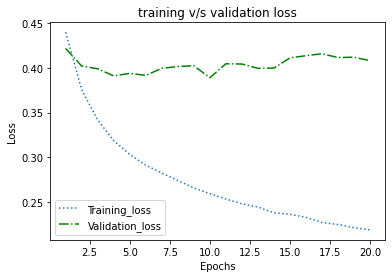

In [26]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('training v/s validation loss')
plt.legend()

In [27]:
#The validation MAE stays in the low 0.40s: we cannot even beat our baseline model using the small convnet. Again, this is because our convnet looks for 
#patterns anywhere in the input timeseries, and has no knowledge of the temporal position of a pattern it sees
#Since more recent datapoints should be interpreted differently from older datapoints in the case of this specific forecasting problem,
# the convnet fails at producing meaningful results here.


#This limitation of convnets was not an issue on IMDB, because patterns of keywords that are associated with a positive or a negative sentiment will be 
#informative independently of where they are found in the input sentences.

# **Combining CNNs and RNNs to process long sequences**

In [28]:
#One strategy to combine the speed and lightness of convnets with the order-sensitivity of RNNs is to use a 1D convnet as a preprocessing step before a RNN.
#This is especially beneficial when dealing with sequences that are so long that they couldn't realistically be processed with RNNs,
# The convnet will turn the long input sequence into much shorter (downsampled) sequences of higher-level features.
#This sequence of extracted features then becomes the input to the RNN part of the network.

In [29]:
#Because this strategy allows us to manipulate much longer sequences, we could either look at data from further back (by increasing the lookback parameter of
# the data generator), or look at high-resolution timeseries (by decreasing the step parameter of the generator). 

In [38]:
# This was previously set to 6 (one point per hour).
# Now 3 (one point per 30 min).
step = 3
lookback = 1440  # Unchanged
delay = 144 # Unchanged

train_gen = generator(data=float_data,lookback=lookback,delay=delay, min_index=0, max_index=200000,shuffle=True,step=step)
val_gen = generator(data=float_data,lookback=lookback,delay=delay, min_index=200001, max_index=300000,step=step)
test_gen = generator(data=float_data,lookback=lookback,delay=delay, min_index=300001, max_index=None,step=step)


#this is how many steps to draw from 'val_gen' in order to see the whole validation set:
val_steps = (300000-200001)//batch_size
#this is how many steps to draw from 'test_gen' in order to see the whole test set:
test_steps = (len(float_data)-300001)//batch_size

# **Network Building**

In [40]:
from keras.layers import GRU

input = Input(shape=(lookback//step,float_data.shape[-1]))
output = Conv1D(32,5,activation='relu')(input)
output = MaxPool1D(3)(output)
output = Conv1D(32,5,activation='relu')(output)
output = GRU(32,dropout=0.2,recurrent_dropout=0.5)(output)
output = Dense(1)(output)

model = Model(inputs=input, outputs=output)
model.compile(optimizer = RMSprop(learning_rate=1e-4),loss='mae')
model.fit_generator(train_gen,steps_per_epoch=500, epochs=20,validation_data=val_gen, validation_steps=val_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 191s 377ms/step - loss: 0.4303 - val_loss: 0.3241
Epoch 2/20
500/500 [==============================] - 188s 376ms/step - loss: 0.3502 - val_loss: 0.3060
Epoch 3/20
500/500 [==============================] - 187s 375ms/step - loss: 0.3299 - val_loss: 0.2958
Epoch 4/20
500/500 [==============================] - 185s 370ms/step - loss: 0.3194 - val_loss: 0.2915
Epoch 5/20
500/500 [==============================] - 185s 370ms/step - loss: 0.3126 - val_loss: 0.2883
Epoch 6/20
500/500 [==============================] - 185s 370ms/step - loss: 0.3059 - val_loss: 0.2813
Epoch 7/20
500/500 [==============================] - 187s 374ms/step - loss: 0.3022 - val_loss: 0.2784
Epoch 8/20
500/500 [==============================] - 185s 371ms/step - loss: 0.2967 - val_loss: 0.2786
Epoch 9/20
500/500 [==============================] - 186s 372ms/step - loss: 0.2944 - val_loss: 0.2736
Epoch 10/20
500/500 [==============================] - 186s 371m

**Training and validation Mean Absolute Errors:**

In [41]:
dict_ = model.history.history
dict_.keys()

train_loss = dict_['loss']
val_loss = dict_['val_loss']
epochs = range(1,len(train_loss)+1)

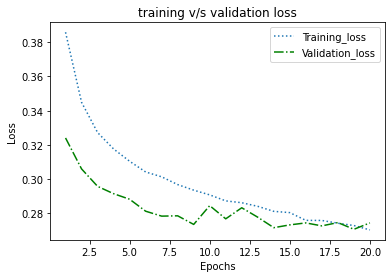

In [42]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('training v/s validation loss')
plt.legend()

In [43]:
#Judging from the validation loss, this setup is not quite as good as the regularized GRU alone, but it's significantly faster.
#It is looking at twice more data, which in this case doesn't appear to be hugely helpful, but may be important for other datasets.